# 2b and 2c Posterior comparison

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../src/core.py
pd.set_option('display.precision',4)

def create_df(fc):
    df = pd.DataFrame(data=fc.copy(), columns=lpf.ps.names)
    df['tcc'] = df.tc - floor(df.tc.mean())
    df['pc'] = df.p - 10
    df['ecc'] = df.secw**2+df.sesw**2
    df['w'] = arctan2(df.sesw, df.secw)
    df['e'] *= 1e6
    df['k'] = sqrt(df.k2)
    df['a'] = as_from_rhop(df.rho, df.p)
    df['I'] = np.rad2deg(arccos(df.b/df.a))
    df['u'] = 2*sqrt(df.q1)*df.q2
    df['v'] = sqrt(df.q1)*(1-2*df.q2)
    df['T14'] = 24*T14(df.p, df.a, df.k, radians(df.I))
    df = df.drop(['k2','q1','q2'], axis=1)
    return df

In [3]:
lpf = LPFunction()
chs = [load(join(DRESULT, '02{:s}.npz'.format(run)))['chains'] for run in 'b c'.split()]
fcs = [ch[:,50:,:].reshape([-1, lpf.ps.ndim]) for ch in chs]
mps = [median(fc, 0) for fc in fcs]
dfs = list(map(create_df, fcs))

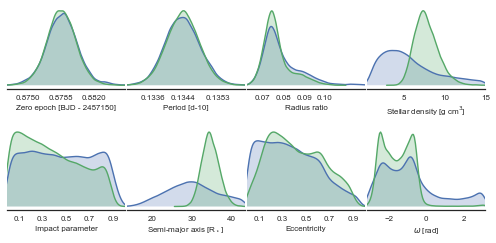

In [4]:
sb.set_context('paper')
fig,ax = subplots(2,4, figsize=(AAPGW,AAOCW))

pars = 'tcc pc k rho b a ecc w'.split()
labels = ('Zero epoch [BJD - {:7d}], Period [d-10], Radius ratio, '
          'Stellar density [g cm$^3$], '
          'Impact parameter, Semi-major axis [R$_\star$], Eccentricity, $\omega$ [rad]'.format(bjdref+2317).split(', '))
             
for i,(par,label) in enumerate(zip(pars,labels)):
    sb.kdeplot(dfs[0][par], shade=True, ax=ax.flat[i], legend=False)
    sb.kdeplot(dfs[1][par], shade=True, ax=ax.flat[i], legend=False)
    setp(ax.flat[i], xlabel=label, xlim=percentile(dfs[0][par], [0.05,99.95]))

sb.despine(fig, left=True)
setp(sum([a.get_yticklabels() for a in ax.flat]), visible=False)
[a.xaxis.label.set_size(8) for a in ax.flat] 

setp(ax[0,0], xticks=linspace(0.875,0.882, 3))
setp(ax[0,1], xticks=np.round(percentile(dfs[0].pc, [3,50,97]), 4))
setp(ax[0,2], xticks=linspace(0.07, 0.1, 4))
setp(ax[1,0], xticks=linspace(0.1,0.9, 5), xlim=(0,1))
setp(ax[1,2], xticks=linspace(0.1,0.9, 5), xlim=(0,1))

fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
fig.savefig(join(DPLOT, 'basic_parameter_estimates_wn_pub.pdf'))

---

<center> &copy; 2017 Hannu Parviainen</center>